In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
from utils import *

In [2]:
epsilon = 0.05
c = 2.5
mu = 0.2
alpha = 1
beta = 10
J = np.array([[-epsilon, mu], [-c, alpha]])
eigs = np.linalg.eigvals(J)
print(eigs)
print(np.linalg.det(J))

def rhs(t, y): 
    rhs = J @ y 
    rhs[1] -= beta*y[1]**3 
    return rhs

n_frames = 5000 
T = n_frames * 3.3e-2
t_eval = np.linspace(0, T, n_frames)
det_res = solve_ivp(rhs, [0, T], [0.01, 0.01], method='LSODA', t_eval=t_eval)

[0.475+0.47368238j 0.475-0.47368238j]
0.45000000000000007


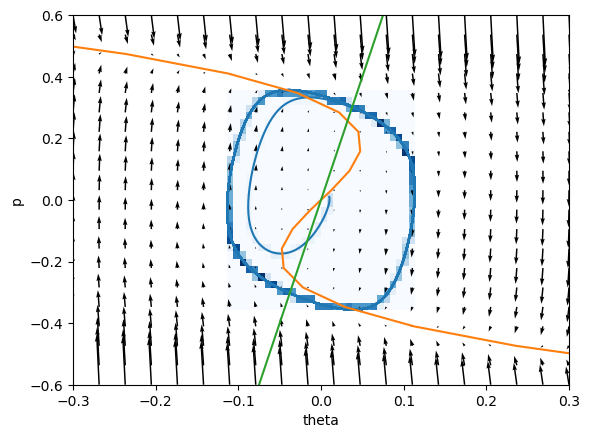

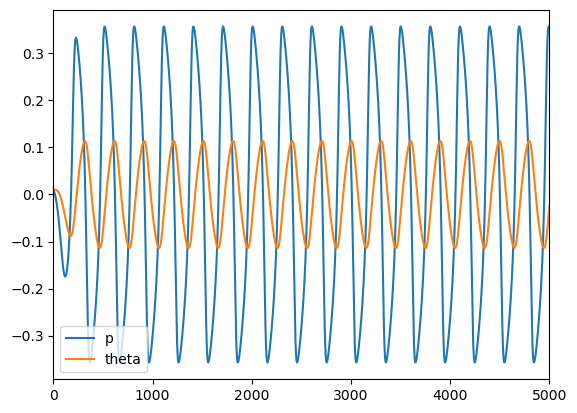

In [3]:
x = np.linspace(-0.3, 0.3, 20)
y = np.linspace(-0.6, 0.6, 20)
X, Y = np.meshgrid(x, y)
coor = np.stack([X, Y], axis=0)

def rhs2(coor): 
    rhs = np.einsum('ij,jkl->ikl', J, coor)
    rhs[1] -= beta*coor[1]**3 
    return rhs

v = rhs2(coor)

plt.hist2d(det_res.y[0], det_res.y[1], bins=30, density=True, cmap='Blues')
plt.quiver(X, Y, v[0], v[1])
plt.plot(det_res.y[0], det_res.y[1])
plt.plot((alpha*y - beta*y**3)/(c), y)
plt.plot(x, mu*y/epsilon)
plt.xlabel('theta')
plt.ylabel('p')
plt.xlim([x[0], x[-1]])
plt.ylim([y[0], y[-1]])
plt.show() 

plt.plot(det_res.y[1][:5000], label='p')
plt.plot(det_res.y[0][:5000], label='theta')
plt.legend() 
plt.xlim([0, 5000])
plt.show() 

In [4]:
sigma = 0.8

J = np.array([[-epsilon, mu], [-c, alpha]])
eigs = np.linalg.eigvals(J)
print(eigs)
print(np.linalg.det(J))

def _update(y, dt): 
    rhs = J @ y 
    rhs[1] += -beta*y[1]**3 + sigma*np.random.normal()/np.sqrt(dt)
    y += rhs*dt 

dt = 5e-3
n_frames = 5000 
T = n_frames*3.3e-2
n_repeats = 8
results = [] 
for n in range(n_repeats): 

    y = np.array([0.01, 0.01])
    res = np.zeros((n_frames, 2))
    for i in range(n_frames):
        for j in range(int(T/n_frames/dt)):
            _update(y, dt)
        res[i] = np.copy(y)
    results.append(res.T)
results = np.array(results)

[0.475+0.47368238j 0.475-0.47368238j]
0.45000000000000007


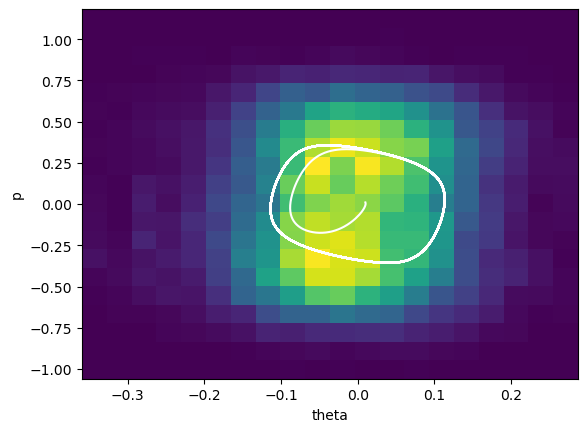

In [5]:
thetas = np.concatenate([d[0] for d in results])
ps = np.concatenate([d[1] for d in results])

plt.hist2d(thetas, ps, bins=20)
plt.plot(det_res.y[0], det_res.y[1], color='white')
plt.xlabel('theta')
plt.ylabel('p')
plt.show() 

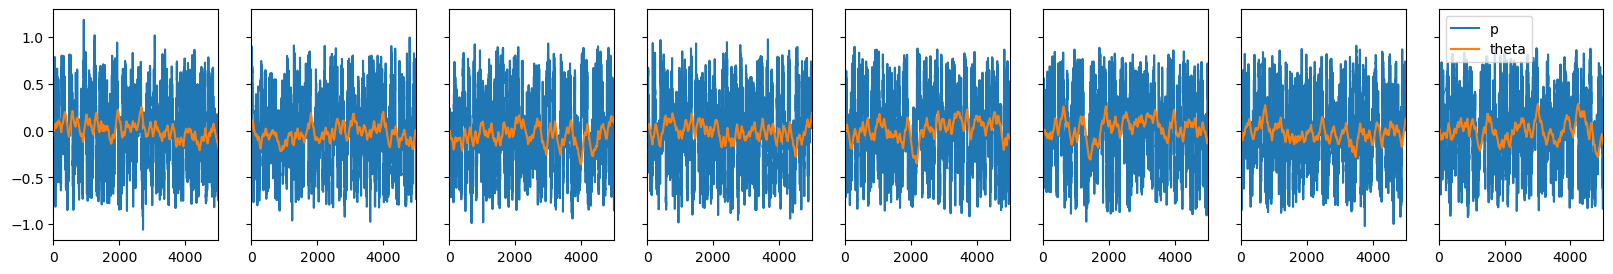

In [6]:
show(results)

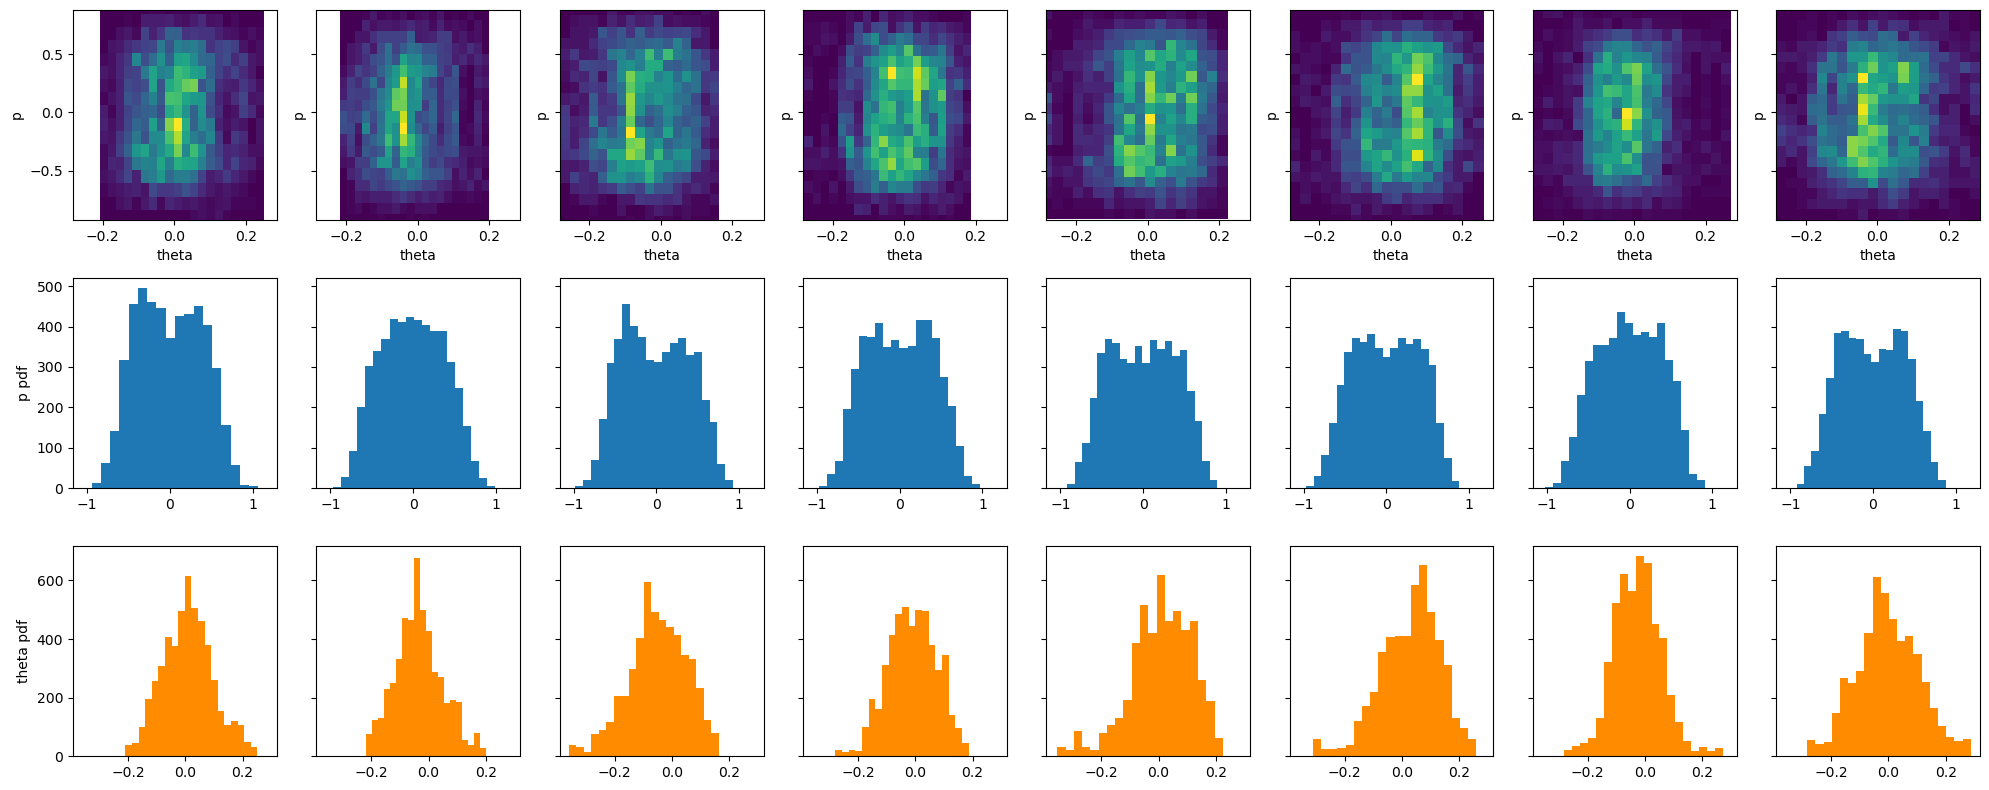

In [7]:
plot_dist(results)

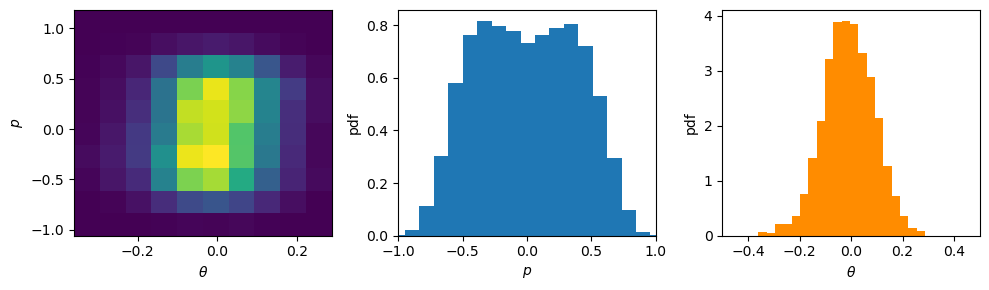

In [8]:
plot_overall_dist(results)

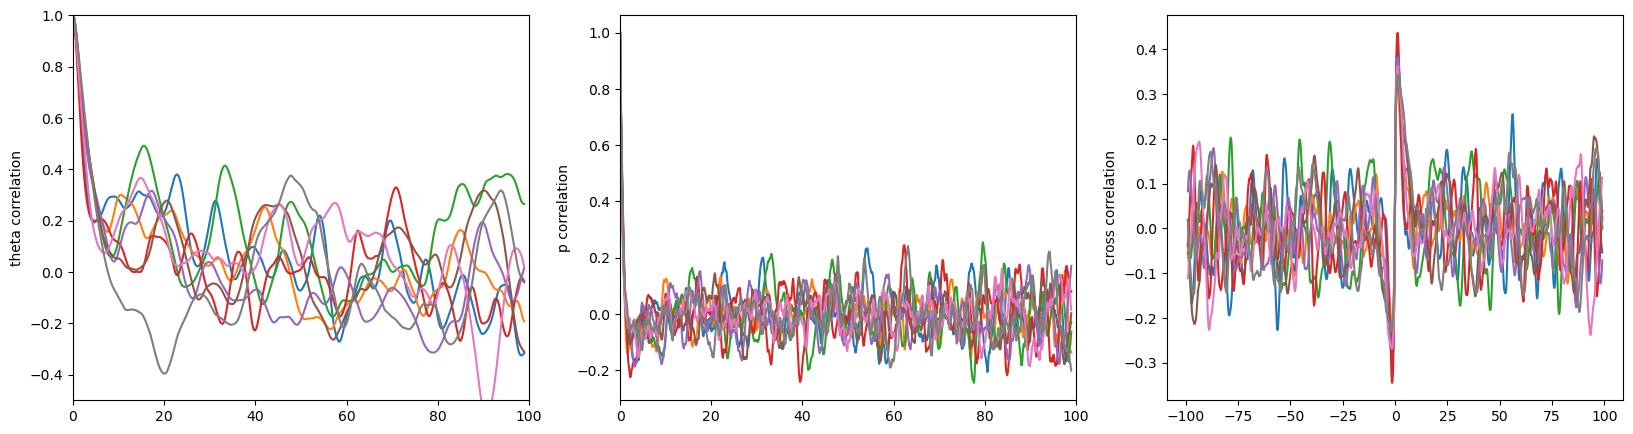

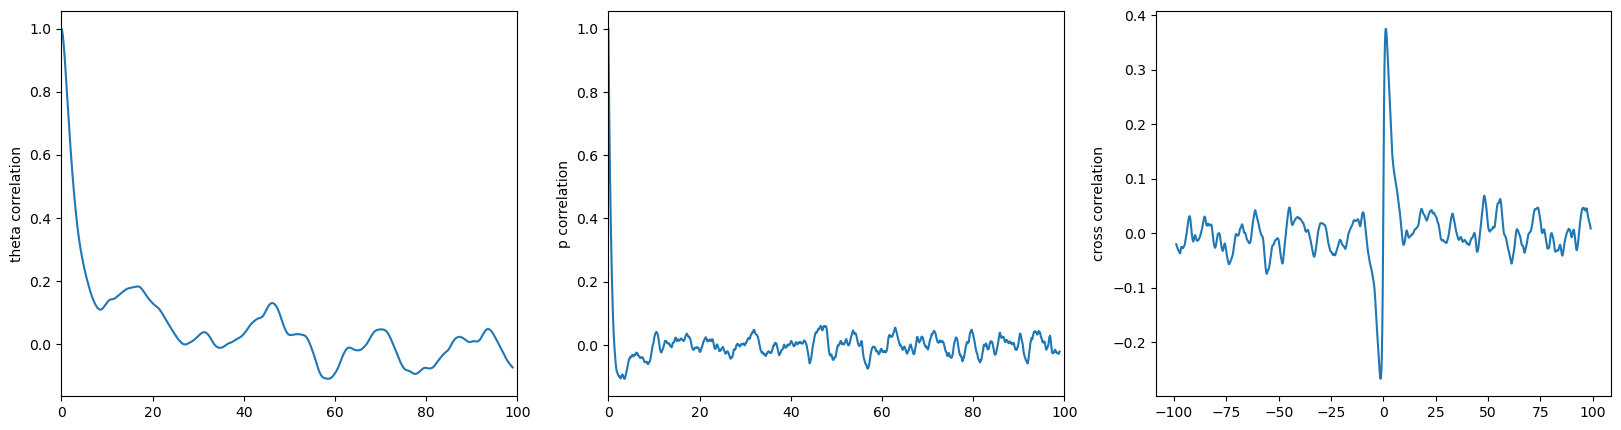

In [9]:
plot_corr(results, 3000, 3.3e-2); 

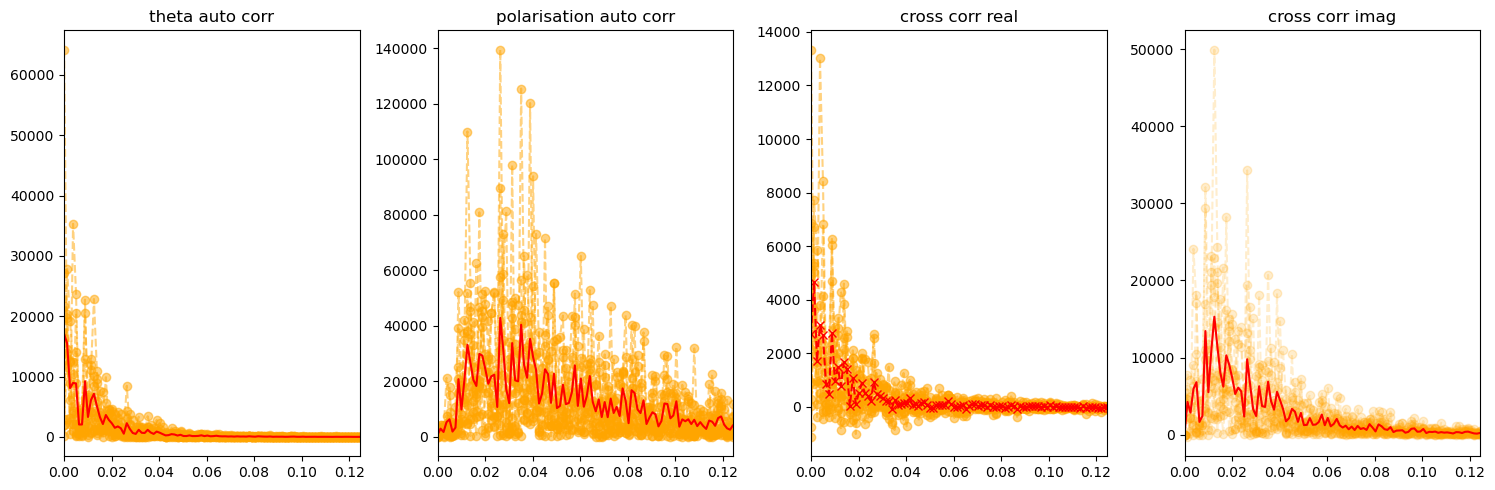

In [10]:
plot_corr_ft(results, 3.3e-2); 